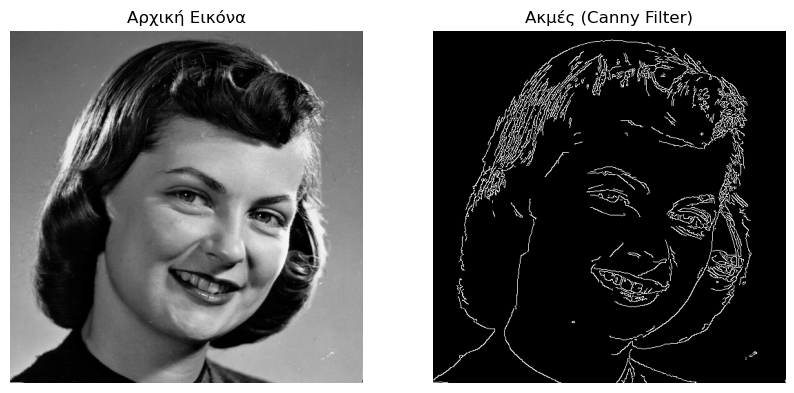

In [4]:
import cv2
import matplotlib.pyplot as plt

# 1. Φόρτωση της εικόνας σε grayscale
img = cv2.imread('girlface.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Εφαρμογή φίλτρου Canny για εντοπισμό ακμών
edges = cv2.Canny(img, threshold1=100, threshold2=200)

# 3. Εμφάνιση του αποτελέσματος
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Αρχική Εικόνα")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Ακμές (Canny Filter)")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


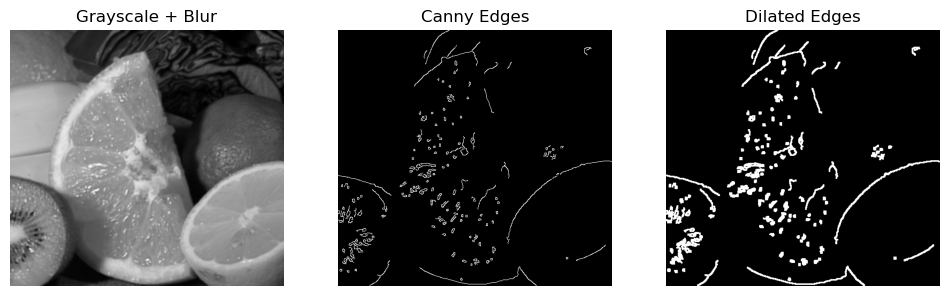

In [5]:
import cv2
import matplotlib.pyplot as plt

# 1. Φόρτωση εικόνας και μετατροπή σε grayscale
img = cv2.imread('fruits.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Προ-επεξεργασία: Gaussian Blur για μείωση θορύβου
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# 3. Εντοπισμός περιγραμμάτων με Canny
edges = cv2.Canny(blur, 80, 180)

# 4. (προαιρετικό) Διεύρυνση ακμών για πιο έντονα περιγράμματα
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dilated = cv2.dilate(edges, kernel, iterations=1)

# 5. Εμφάνιση
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title("Grayscale + Blur")
plt.imshow(blur, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Canny Edges")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Dilated Edges")
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.show()


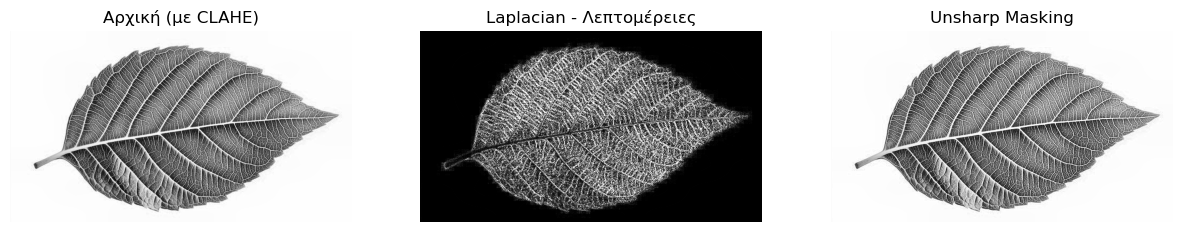

In [6]:
import cv2
import matplotlib.pyplot as plt

# 1. Φόρτωση της εικόνας σε grayscale
img = cv2.imread('leaf.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Προ-επεξεργασία: Αντίθεση με CLAHE για ενίσχυση λεπτομερειών
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast_img = clahe.apply(img)

# 3. Laplacian φίλτρο για εντοπισμό λεπτομερειών
laplacian = cv2.Laplacian(contrast_img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# 4. Unsharp masking (προαιρετικά για έξτρα λεπτομέρεια)
blurred = cv2.GaussianBlur(contrast_img, (3,3), 0)
unsharp = cv2.addWeighted(contrast_img, 1.5, blurred, -0.5, 0)

# 5. Εμφάνιση
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title("Αρχική (με CLAHE)")
plt.imshow(contrast_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Laplacian - Λεπτομέρειες")
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Unsharp Masking")
plt.imshow(unsharp, cmap='gray')
plt.axis('off')

plt.show()
